<a href="https://colab.research.google.com/github/ParastooAzizinezhad/CE888-Labs/blob/master/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lab 2: bootstrap

In [0]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np


In [0]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]

In [3]:
df.head

<bound method NDFrame.head of     Day   Millons of pounds in sales
0     1                          2.0
1     2                          8.0
2     3                         20.0
3     4                         13.0
4     5                          5.0
5     6                          9.0
6     7                         10.0
7     8                          8.0
8     9                         22.0
9    10                         10.0
10   11                          2.0
11   12                          4.0
12   13                          7.0
13   14                          9.0>

In [6]:
df.size

28

Checking the notes from the lecture, create here your own bootstrap function:
1. Create an array of samples of shape (n_iterations, sample_size)
2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
3. In each iteration:
3.1 Get the data corresponding to that iteration (new_samples[iteration, :])
3.2 Calculate the mean of the iteration data and store it
(At this point you should have an array of n_iterations values)
4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
5. Return data_mean, and the lower and upper bounds of your interval

In [0]:
def boostrap_mean(sample, sample_size, n_iterations):
  new_samples = np.random.choice(sample_size, size=(n_iterations, sample_size), replace =True)
  data_mean = np.mean(new_samples)
  means = [np.mean(new_samples) for new_samples in new_samples]
  means = np.sort(means)
  ci = 0.95
  lower = np.percentile(means, ((1-ci)/2) *100)
  upper = np.percentile(means, (ci+((1-ci)/2)) *100)
  return data_mean, lower, upper

(0, 100000)

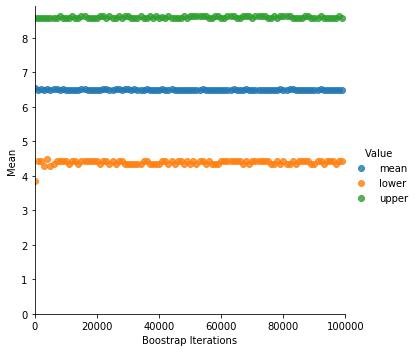

In [40]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)


In [0]:

#sns_plot.savefig("bootstrap_confidence.png", bbox_inches='tight')

#sns_plot.savefig("bootstrap_confidence.pdf", bbox_inches='tight')


Now, modify the bootstrap function so that you can pass your desired confidence interval as a parameter.

In [0]:
def boostrap_mean_ci(sample, sample_size, n_iterations, ci):
  new_samples = np.random.choice(sample_size, size=(n_iterations, sample_size), replace =True)
  data_mean = np.mean(new_samples)
  means = [np.mean(new_samples) for new_samples in new_samples]
  means = np.sort(means)
  lower = np.percentile(means, ((1-ci)/2) *100)
  upper = np.percentile(means, (ci+((1-ci)/2)) *100)
  return data_mean, lower, upper

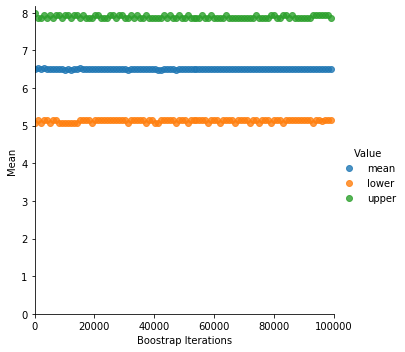

In [34]:
boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean_ci(data, data.shape[0], i, 0.80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

sns_plot.savefig("bootstrap_confidence_80.png", bbox_inches='tight')
sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')


# Vehicles dataset
Now let's work on a different dataset. Load the vehicles.csv file and check the Moodle page for instructions on how to proceed

In [0]:
# Load and visualise the vehicles dataset
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')


